In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/global/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [ ]:
a=data["AverageTemperature"].mean()

In [ ]:
a

18.1259688528542

In [ ]:
data['AverageTemperature'] = data['AverageTemperature'].fillna(a)

In [ ]:
b=data["AverageTemperatureUncertainty"].mean()
b

0.9693434381505606

In [ ]:
data['AverageTemperatureUncertainty'] = data['AverageTemperatureUncertainty'].fillna(b)

In [ ]:
data.isnull().any()

dt                               False
AverageTemperature               False
AverageTemperatureUncertainty    False
City                             False
Country                          False
Latitude                         False
Longitude                        False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()

In [ ]:
data["City"]=lb.fit_transform(data["City"])
data["Country"]=lb.fit_transform(data["Country"])

In [ ]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,0,11,5.63N,3.23W
1,1849-02-01,27.434,1.362,0,11,5.63N,3.23W
2,1849-03-01,28.101,1.612,0,11,5.63N,3.23W
3,1849-04-01,26.140,1.387,0,11,5.63N,3.23W
4,1849-05-01,25.427,1.200,0,11,5.63N,3.23W


In [ ]:
data["dt"]=pd.to_datetime(data["dt"])

In [ ]:
data.set_index(["dt"],inplace=True)

In [ ]:
data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,0,11,5.63N,3.23W
1849-02-01,27.434,1.362,0,11,5.63N,3.23W
1849-03-01,28.101,1.612,0,11,5.63N,3.23W
1849-04-01,26.140,1.387,0,11,5.63N,3.23W
1849-05-01,25.427,1.200,0,11,5.63N,3.23W


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=data[["AverageTemperature","AverageTemperatureUncertainty","City","Country"]]

In [ ]:
k_range=range(1,16)

In [ ]:
sse=[]

In [ ]:
for i in k_range:
    model=KMeans(n_clusters=i)
    model.fit_predict(x)
    sse.append(model.inertia_)

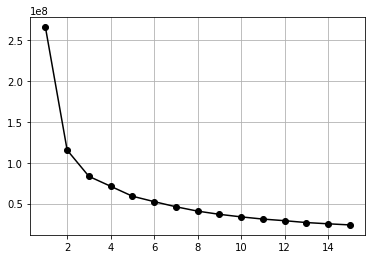

In [ ]:
plt.plot(k_range,sse,marker='o',color='black')
plt.grid()

In [ ]:
model=KMeans(n_clusters=3)

In [ ]:
y_predict=model.fit_predict(x)
y_predict

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
data['label']=y_predict
data

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,label
dt,,,,,,,
1849-01-01,26.704000,1.435000,0,11,5.63N,3.23W,1
1849-02-01,27.434000,1.362000,0,11,5.63N,3.23W,1
1849-03-01,28.101000,1.612000,0,11,5.63N,3.23W,1
1849-04-01,26.140000,1.387000,0,11,5.63N,3.23W,1
1849-05-01,25.427000,1.200000,0,11,5.63N,3.23W,1
...,...,...,...,...,...,...,...
2013-05-01,18.979000,0.807000,99,8,34.56N,108.97E,2
2013-06-01,23.522000,0.647000,99,8,34.56N,108.97E,2
2013-07-01,25.251000,1.042000,99,8,34.56N,108.97E,2


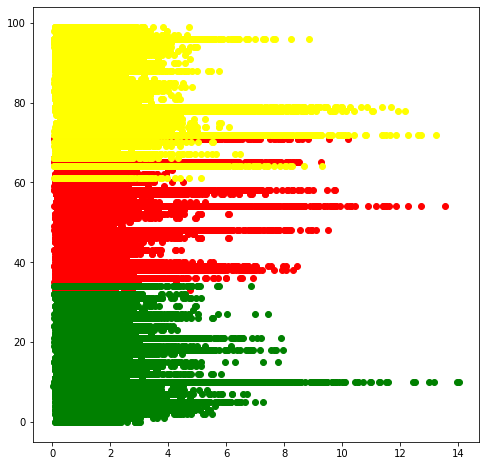

In [ ]:
group1=data[data['label']==0]
group2=data[data['label']==1]
group3=data[data['label']==2]
plt.figure(figsize=(8,8))
plt.scatter(group1['AverageTemperatureUncertainty'],group1['City'],color='red',marker="o")
plt.scatter(group2['AverageTemperatureUncertainty'],group2['City'],color='green',marker="o")
plt.scatter(group3['AverageTemperatureUncertainty'],group3['City'],color='yellow',marker="o")